In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from dataset import load_dataset
from models import ALEXNET, VGGNET, LENET

def show_result(images, labels, test_pred, i, function) :
    plt.imshow(images[i], interpolation='nearest')
    plt.axis('off')
    plt.show()

    target = np.argmax(labels[i])
    pred = np.argmax(test_pred[i])
    
    if function == 'count' :
        if target == 11:
            print("Target: More than 10 items")
        else :
            print("Target: " + str(target) + " items")

        if target == 11:
            print("Prediction: More than 10 items")
        else :
            print("Prediction: %d items by %.2f percent" % (pred, (test_pred[i][pred])*100))
    
    else :
        print("Target: item number " + str(target))
        print("Prediction: item number %d by %.2f percent" % (pred, (test_pred[i][pred])*100))

def test(model, sess, saver, test_data, function, difficulty, batch_size):
    """
    Tester
    """
    batch_image, batch_image_index = test_data.get_batch_tensor(batch_size=batch_size)

    with tf.Session() as _sess:
        _sess.run(tf.local_variables_initializer())
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(sess=_sess, coord=coord)
        final_test_metric = 0
        batch_cnt = 0
        
        try:
            while not coord.should_stop():
                images, indices = _sess.run([batch_image, batch_image_index])
                labels = test_data.get_labels_from_indices(indices, function, difficulty)
                test_metric, test_pred, test_pred_one = model.eval_metric(images, labels)
                print('test accuracy : %.4f' % (test_metric))
                final_test_metric = final_test_metric + test_metric
                batch_cnt = batch_cnt + 1
                
                for b in range(batch_size) :
                    show_result(images, labels, test_pred, b, function)
                
        except tf.errors.OutOfRangeError:
            print('final test accuracy : %.4f' % (final_test_metric/batch_cnt))
            print('Done testing -- epoch limit reached')
        finally:
            coord.request_stop()
            coord.join(threads)               
                
def run(model_name, function, difficulty, batch_size, model_filename, learning_rate = 0.0001) :
    with tf.Session() as sess:
            # Define computation graph & Initialize
            print('Building network & initializing variables')
            if model_name == 'ALEXNET':
                model = ALEXNET(function, learning_rate, difficulty, model_filename)
            elif model_name == 'VGGNET':
                model = VGGNET(function, learning_rate, difficulty, model_filename)
            else:
                model = LENET(function, learning_rate, difficulty, model_filename)

            model.init_sess(sess)
            saver = tf.train.Saver()

            # Process data
            print("Load dataset")
            dataset = load_dataset()
            test_data = dataset.test

            print('Loading best checkpointed model')
            saver.restore(sess, "../"+model.model_filename)
            test(model, sess, saver, test_data, function, difficulty, batch_size)

Building network & initializing variables
Load dataset
Loading best checkpointed model
INFO:tensorflow:Restoring parameters from ../model/VGG_classify_hard.ckpt
load dataset for test
use filename format /Users/Ji-Eun/Desktop/2017-2/Creative/mxnet-amznbin/dataset/test_*.tfrecords
is_training == False : FIFOQueue
Tensor("shuffle_batch:0", shape=(10, 224, 224, 3), dtype=uint8)
Tensor("shuffle_batch:1", shape=(10,), dtype=int64)
test accuracy : 40.0000


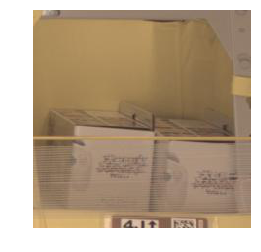

Target: item number 22
Prediction: item number 17 by 100.00 percent


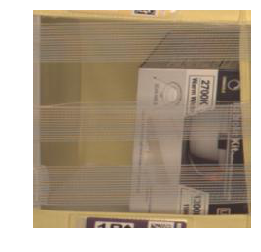

Target: item number 33
Prediction: item number 30 by 100.00 percent


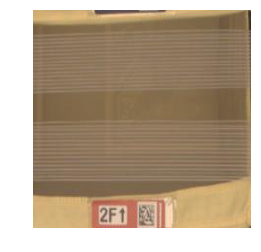

Target: item number 0
Prediction: item number 0 by 100.00 percent


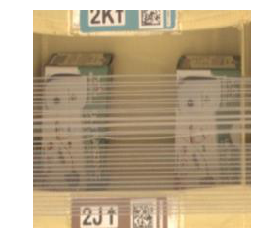

Target: item number 2
Prediction: item number 35 by 100.00 percent


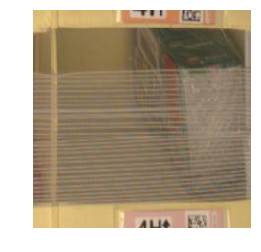

Target: item number 24
Prediction: item number 35 by 100.00 percent


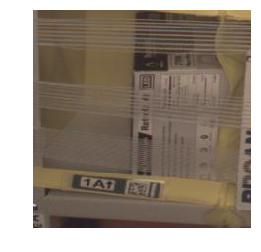

Target: item number 33
Prediction: item number 20 by 100.00 percent


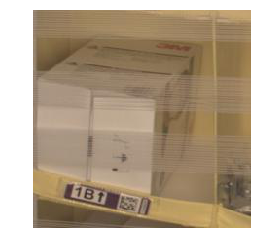

Target: item number 12
Prediction: item number 12 by 100.00 percent


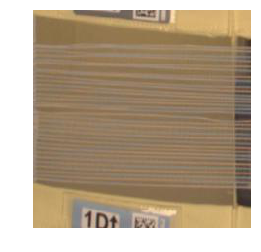

Target: item number 0
Prediction: item number 0 by 100.00 percent


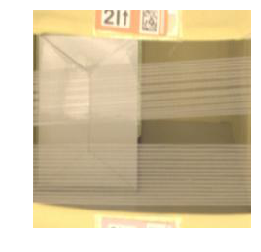

Target: item number 25
Prediction: item number 35 by 100.00 percent


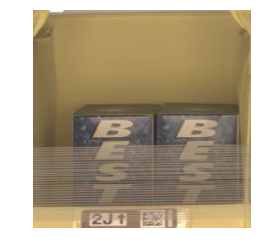

Target: item number 13
Prediction: item number 13 by 100.00 percent
test accuracy : 50.0000


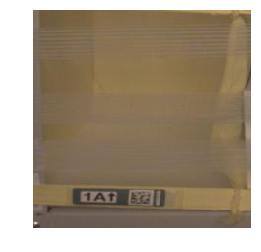

Target: item number 0
Prediction: item number 0 by 100.00 percent


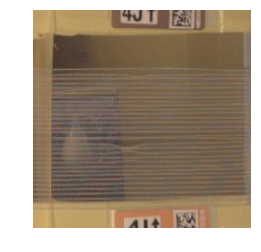

Target: item number 13
Prediction: item number 13 by 100.00 percent


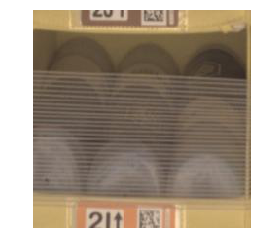

Target: item number 4
Prediction: item number 24 by 100.00 percent


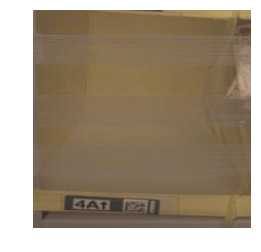

Target: item number 0
Prediction: item number 0 by 100.00 percent


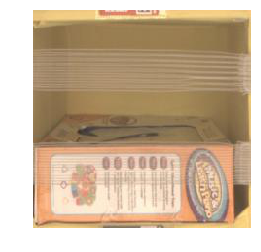

Target: item number 29
Prediction: item number 29 by 100.00 percent


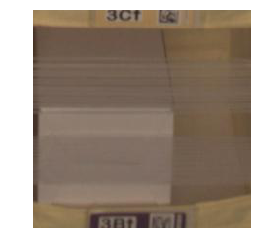

Target: item number 19
Prediction: item number 37 by 100.00 percent


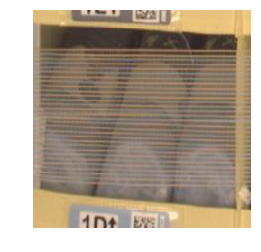

Target: item number 4
Prediction: item number 4 by 100.00 percent


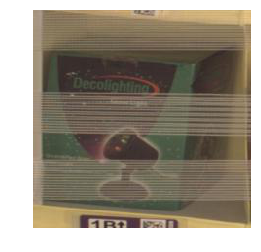

Target: item number 25
Prediction: item number 13 by 100.00 percent


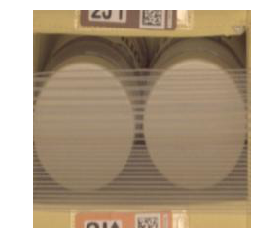

Target: item number 43
Prediction: item number 37 by 100.00 percent


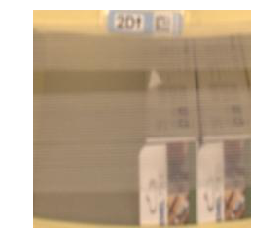

Target: item number 16
Prediction: item number 0 by 100.00 percent
test accuracy : 50.0000


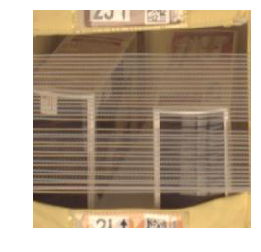

Target: item number 5
Prediction: item number 5 by 100.00 percent


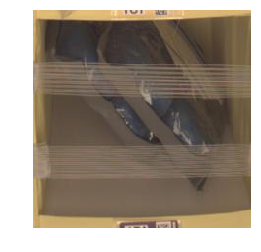

Target: item number 42
Prediction: item number 17 by 100.00 percent


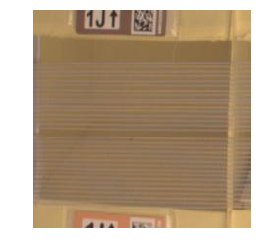

Target: item number 0
Prediction: item number 0 by 100.00 percent


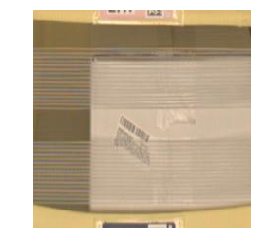

Target: item number 26
Prediction: item number 37 by 100.00 percent


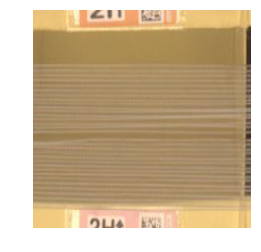

Target: item number 0
Prediction: item number 0 by 100.00 percent


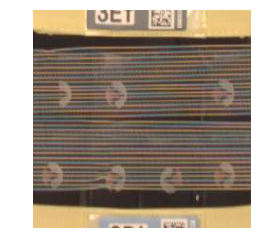

Target: item number 11
Prediction: item number 11 by 100.00 percent


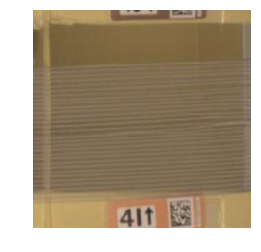

Target: item number 0
Prediction: item number 0 by 100.00 percent


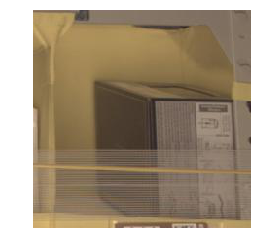

Target: item number 8
Prediction: item number 25 by 100.00 percent


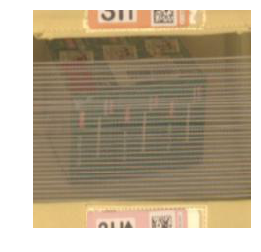

Target: item number 24
Prediction: item number 21 by 100.00 percent


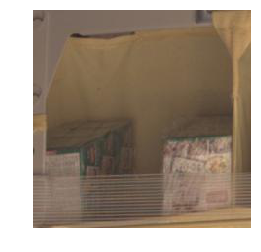

Target: item number 24
Prediction: item number 21 by 100.00 percent
test accuracy : 60.0000


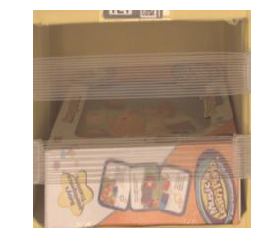

Target: item number 29
Prediction: item number 29 by 100.00 percent


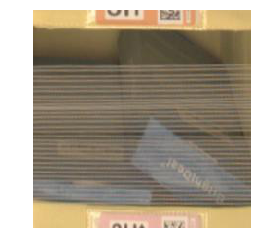

Target: item number 34
Prediction: item number 4 by 100.00 percent


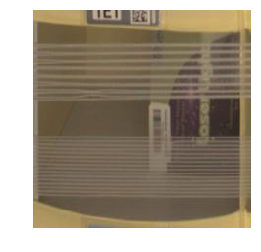

Target: item number 25
Prediction: item number 25 by 100.00 percent


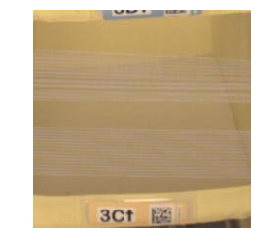

Target: item number 0
Prediction: item number 0 by 100.00 percent


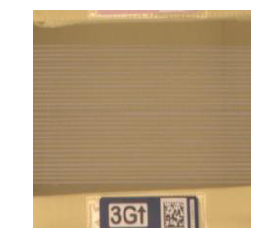

Target: item number 0
Prediction: item number 0 by 100.00 percent


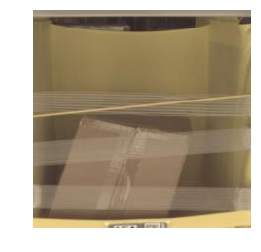

Target: item number 17
Prediction: item number 17 by 100.00 percent


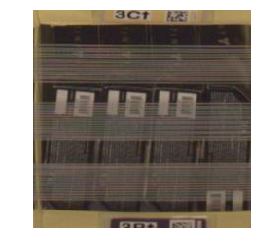

Target: item number 15
Prediction: item number 33 by 100.00 percent


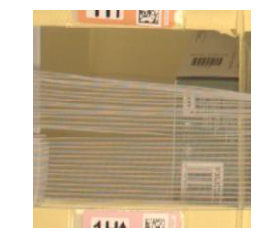

Target: item number 16
Prediction: item number 21 by 100.00 percent


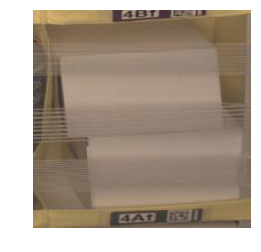

Target: item number 19
Prediction: item number 12 by 100.00 percent


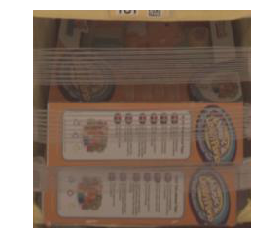

Target: item number 29
Prediction: item number 29 by 100.00 percent
test accuracy : 20.0000


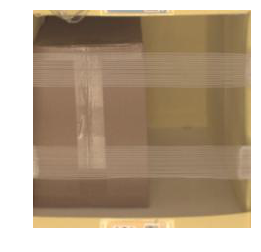

Target: item number 17
Prediction: item number 17 by 100.00 percent


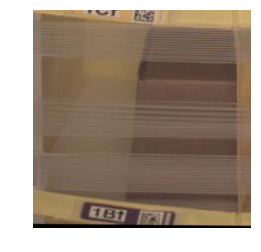

Target: item number 35
Prediction: item number 0 by 100.00 percent


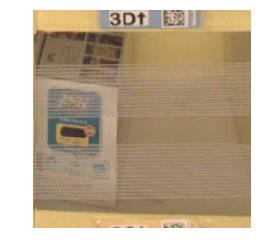

Target: item number 22
Prediction: item number 21 by 100.00 percent


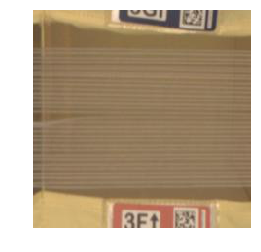

Target: item number 0
Prediction: item number 0 by 100.00 percent


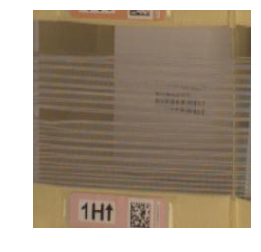

Target: item number 19
Prediction: item number 30 by 100.00 percent


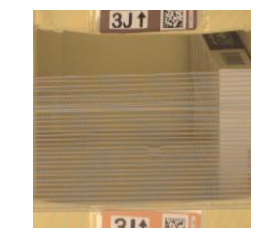

Target: item number 21
Prediction: item number 0 by 100.00 percent


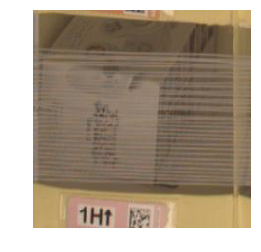

Target: item number 22
Prediction: item number 16 by 100.00 percent


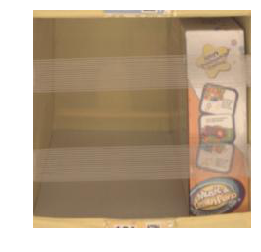

Target: item number 29
Prediction: item number 39 by 100.00 percent


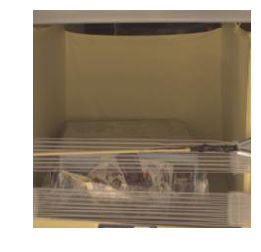

Target: item number 7
Prediction: item number 29 by 100.00 percent


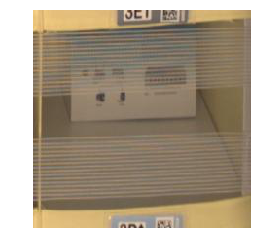

Target: item number 32
Prediction: item number 35 by 100.00 percent
test accuracy : 10.0000


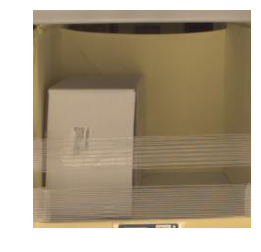

Target: item number 26
Prediction: item number 17 by 100.00 percent


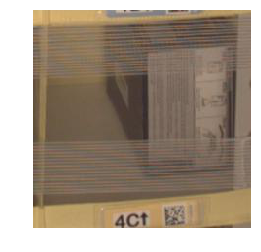

Target: item number 10
Prediction: item number 30 by 100.00 percent


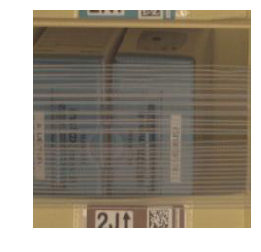

Target: item number 30
Prediction: item number 13 by 100.00 percent


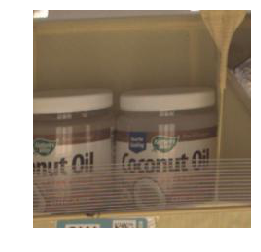

Target: item number 43
Prediction: item number 13 by 100.00 percent


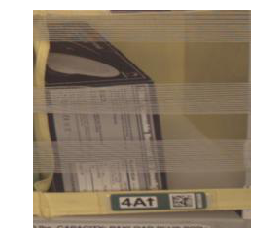

Target: item number 8
Prediction: item number 21 by 100.00 percent


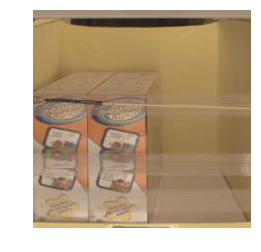

Target: item number 29
Prediction: item number 26 by 100.00 percent


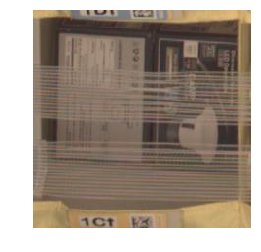

Target: item number 10
Prediction: item number 6 by 100.00 percent


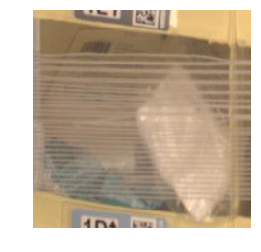

Target: item number 28
Prediction: item number 35 by 100.00 percent


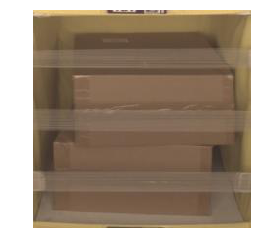

Target: item number 17
Prediction: item number 17 by 100.00 percent


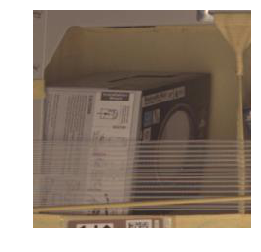

Target: item number 33
Prediction: item number 32 by 100.00 percent
test accuracy : 30.0000


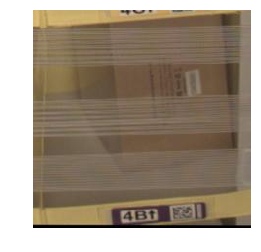

Target: item number 36
Prediction: item number 26 by 100.00 percent


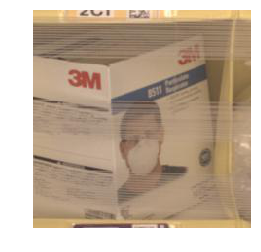

Target: item number 12
Prediction: item number 26 by 100.00 percent


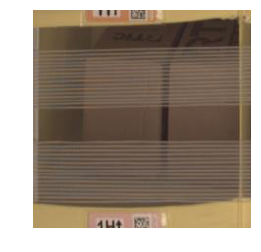

Target: item number 6
Prediction: item number 35 by 100.00 percent


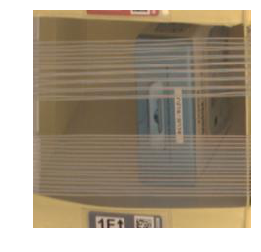

Target: item number 30
Prediction: item number 8 by 100.00 percent


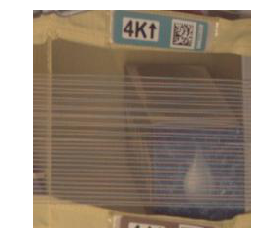

Target: item number 13
Prediction: item number 6 by 100.00 percent


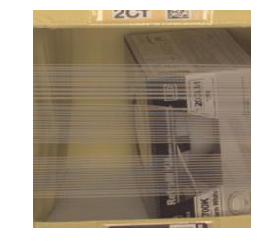

Target: item number 33
Prediction: item number 39 by 100.00 percent


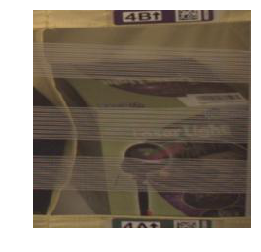

Target: item number 25
Prediction: item number 39 by 100.00 percent


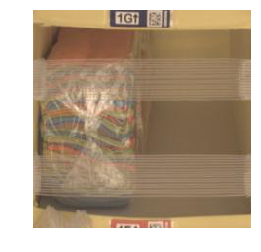

Target: item number 23
Prediction: item number 23 by 100.00 percent


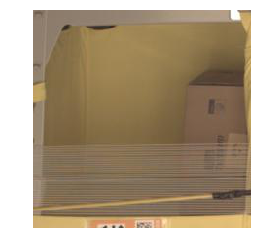

Target: item number 41
Prediction: item number 41 by 100.00 percent


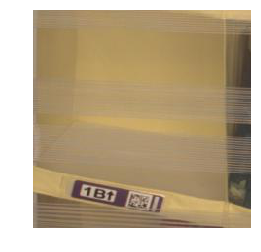

Target: item number 0
Prediction: item number 0 by 100.00 percent
final test accuracy : 37.1429
Done testing -- epoch limit reached


In [2]:
run("VGGNET", "classify", "hard", 10, "VGG_classify_hard")